In [3]:
!pip install pykalman

In [13]:
%matplotlib inline

from pykalman import KalmanFilter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [15]:
tau=0.1
#Set up the filter
kf= KalmanFilter(n_dim_obs=1, n_dim_state=2, 
                 initial_state_mean=[30,10],
                 initial_state_covariance=np.eye(2),
                 transition_matrices=[[1,tau],[0,1]],
                 observation_matrices=[[1,0]], 
                 observation_covariance=3,
                 transition_covariance=np.zeros((2,2)),
                 transition_offsets=[-4.9*tau**2, -9.8*tau])

In [16]:
times=np.arange(40)
actual=-4.9*tau**2*times**2

sim= actual+3*np.random.randn(40)

state_means, state_covs=kf.filter(sim)

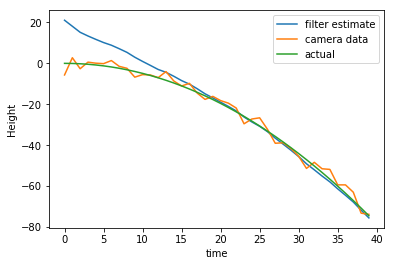

In [21]:
plt.plot(times, state_means[:,0])
plt.plot(times,sim)
plt.plot(times,actual)
plt.legend(['filter estimate','camera data','actual'])
plt.xlabel('time')
plt.ylabel('Height')

In [22]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2013, 1, 1)
end=datetime.datetime(2015,1, 27)

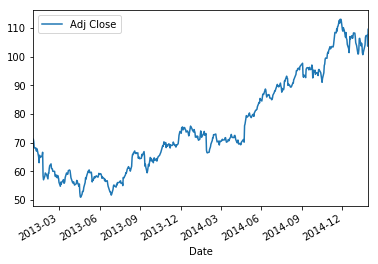

In [27]:
f= web.DataReader("AAPL", "yahoo", start, end)
f.plot(f.index,'Adj Close')

In [45]:
%matplotlib notebook

<IPython.core.display.Javascript object>


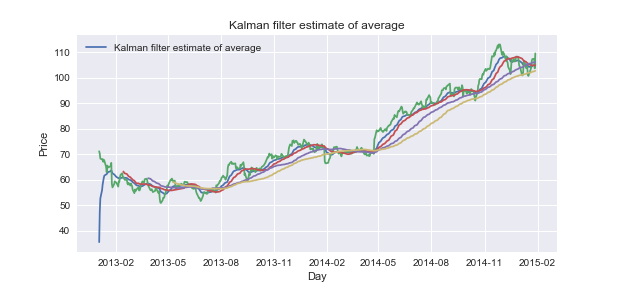

In [46]:
x=f['Adj Close']
kf= KalmanFilter(transition_matrices=[1], 
                 observation_matrices=[1],
                 initial_state_mean=0,
                 initial_state_covariance= 1,
                
                 observation_covariance=1,
                 transition_covariance=.01)

state_means,_=kf.filter(x.values)
state_means = pd.Series(state_means.flatten(), index=f.index)

mean30 = x.rolling(window=30).mean()
mean60 = x.rolling(window=60).mean()
mean90 = x.rolling(window=90).mean()

plt.plot(state_means)
plt.plot(x)
plt.plot(mean30)
plt.plot(mean60)
plt.plot(mean90)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman filter estimate of average'])
plt.xlabel('Day')
plt.ylabel('Price')

In [32]:
import seaborn as snb